In [37]:
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df_artists = pd.read_csv("top_artist_lastfm.csv")

In [39]:
df_tracks = pd.read_csv("top_tracks_lastfm.csv")

In [40]:
#Aqui vamos a agrupar las canciones por artista
tracks_por_artista = (
    df_tracks
    .groupby("artist")
    .size()
    .reset_index(name = "num_tracks")
)

In [42]:
#Determinamos la popularidad según el artista y el número de reproducciones
popularidad = df_artists[["name", "playcount"]]

In [82]:
#Aquí nos aseguramos de que ambas listas tengan una columna llamada "Artist"
tracks_por_artista = tracks_por_artista.rename(
    columns={"artist.name": "artist"}
)

In [48]:
popularidad = popularidad.rename(
    columns = {"name": "artist"}
)

In [49]:
#Y finalmente unimos ambas tablas para determinar la popularidad
df_correlacion = tracks_por_artista.merge(
    popularidad,
    on = "artist",
    how = "inner"
)

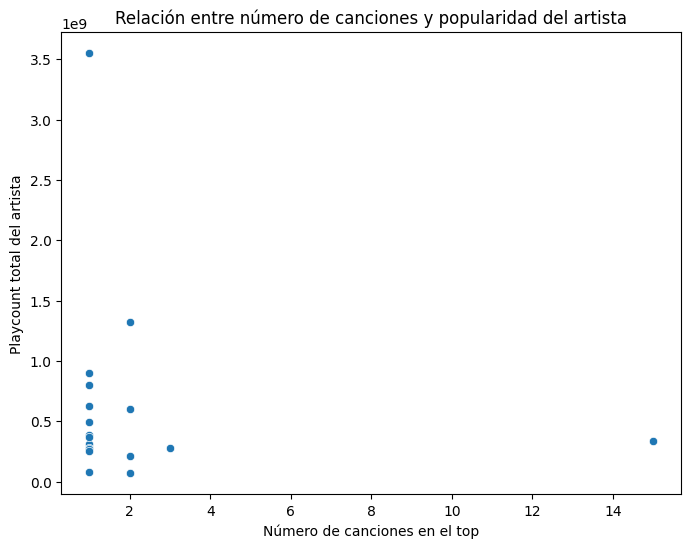

In [59]:
#Aquí hacemos la correlacion de Pearson para sacar el coeficiente
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_correlacion,
    x="num_tracks",
    y="playcount"
)

plt.title("Relación entre número de canciones y popularidad del artista")
plt.xlabel("Número de canciones en el top")
plt.ylabel("Playcount total del artista")
plt.show()


In [62]:
#Finalmente con la correlación podemos determinar si existe o no relación entre el número de canciones y la popularidad
correlacion = df_correlacion["num_tracks"].corr(df_correlacion["playcount"])
correlacion
print("con un coeficiente de correlación de ", round(correlacion, 2), "podemos afirmar que no existe una relacion fuerte entre el numero de canciones de un artista y su nivel de popularidad")

con un coeficiente de correlación de  -0.11 podemos afirmar que no existe una relacion fuerte entre el numero de canciones de un artista y su nivel de popularidad


In [86]:
#Ahora vamos a ver qué canciones tienen aquellos artistas poco populares (consideramos poco populares el 25% con menos reproducciones)

umbral_popularidad = df_artists["playcount"].quantile(0.25)

In [68]:
#Aqui vamos a sacar en una tabla cuáles son esos artistas que se encuentran en ese rango de popularidad
artistas_poco_populares = df_artists[
    df_artists["playcount"] <= umbral_popularidad
    ]

In [72]:
artistas_poco_populares

,name,playcount,listeners
13,Bruno Mars,275399110,5067131
16,PinkPantheress,281654754,2800736
23,Justin Bieber,302405569,4639065
24,Fleetwood Mac,280752763,4745802
27,Chappell Roan,313136368,2452724
30,The Marías,211991483,2345693
36,Childish Gambino,312608565,3688798
38,Djo,79549714,2161810
40,Clairo,329805415,2824196
41,Michael Jackson,335957944,6673924


In [70]:
len(artistas_poco_populares)

13

In [93]:
#Ahora buscamos qué artistas poco populares están presentes en la tabla de artistas poco populares
tracks_poco_populares = df_tracks[
    df_tracks["artist"].isin(artistas_poco_populares["name"])
    ]

In [77]:
len(tracks_poco_populares)

12

In [81]:
#Ahora ordenamos la nueva tabla por número de reproducciones y sacamos una conclusión
top_tracks_poco_populares = (
    tracks_poco_populares
    .sort_values(by = "playcount", ascending = False)
)
top_tracks_poco_populares

,name,duration,playcount,listeners,artist
24,"Good Luck, Babe!",218,56409314,1989609,Chappell Roan
43,Lovers Rock,213,47337152,2066515,TV Girl
0,End of Beginning,159,30047095,1842715,Djo
26,No One Noticed,236,29516520,1444649,The Marías
35,Locked Out of Heaven,233,23895913,2357536,Bruno Mars
46,Sports car,165,19537205,848484,Tate McRae
28,Sienna,224,16614931,1045602,The Marías
44,That's What I Like,206,16455705,1762107,Bruno Mars
9,Lush Life,201,11128820,1271238,Zara Larsson
16,Midnight Sun,189,6877113,449758,Zara Larsson


In [80]:

print("a pesar de pertenecer a artistas poco populares, podemos encontrar canciones con numeros de reproducciones bastante altos")

a pesar de pertenecer a artistas poco populares, podemos encontrar canciones con numeros de reproducciones bastante altos


In [85]:
# Pero, y si medimos la popularidad por oyentes?
#Determinamos cuales son aquellos artistas con menos oyentes

umbral_popularidad_lis = df_artists["listeners"].quantile(0.25)

In [89]:
# Sacamos la tabla de estos artistas
artistas_poco_populares_lis = df_artists[
    df_artists["listeners"] <= umbral_popularidad_lis
    ]

In [90]:
artistas_poco_populares_lis

,name,playcount,listeners
12,Sabrina Carpenter,600248738,3112851
16,PinkPantheress,281654754,2800736
27,Chappell Roan,313136368,2452724
30,The Marías,211991483,2345693
35,Playboi Carti,747808568,2400700
37,Future,439172910,3126429
38,Djo,79549714,2161810
39,Olivia Rodrigo,531191387,2982627
40,Clairo,329805415,2824196
42,Lil Uzi Vert,409703765,2638638


In [92]:
#Y hacemos lo mismo con las canciones 
tracks_poco_populares_lis = df_tracks[
    df_tracks["artist"].isin(artistas_poco_populares_lis["name"])
    ]

In [94]:
#Aqui sacamos la tabla de canciones que tienen estos artistas y sacamos una conclusión

top_tracks_poco_populares_lis = (
    tracks_poco_populares_lis
    .sort_values(by = "listeners", ascending = False)
)
top_tracks_poco_populares_lis

,name,duration,playcount,listeners,artist
43,Lovers Rock,213,47337152,2066515,TV Girl
24,"Good Luck, Babe!",218,56409314,1989609,Chappell Roan
0,End of Beginning,159,30047095,1842715,Djo
26,No One Noticed,236,29516520,1444649,The Marías
9,Lush Life,201,11128820,1271238,Zara Larsson
31,Manchild,213,19576839,1091341,Sabrina Carpenter
28,Sienna,224,16614931,1045602,The Marías
37,Tears,160,12638647,910290,Sabrina Carpenter
46,Sports car,165,19537205,848484,Tate McRae
2,Stateside + Zara Larsson,176,4836427,457591,PinkPantheress


In [95]:
print("Como podemos ver, enconctramos canciones con que puntúan alto en oyentes y se situan en distintos rangos de popularidad")

Como podemos ver, enconctramos canciones con que puntúan alto en oyentes y se situan en distintos rangos de popularidad
